In [106]:
import pandas as pd
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram, fcluster

In [76]:
df_artists = pd.read_csv('artists.csv', index_col='artist', converters={'genres': literal_eval, 'albums': literal_eval,
                                                                        'related_artists':literal_eval, 'related_genres':literal_eval})

## Data wrangling

Impute empty genres with related genres

In [77]:
df_artists.loc[df_artists['genres'].apply(lambda x: len(x) == 0), 'genres'] = df_artists['related_genres']

In [78]:
mlb = MultiLabelBinarizer()
mlb.fit(df_artists['genres'])

MultiLabelBinarizer(classes=None, sparse_output=False)

One-hot encode genres

In [79]:
df_genres = pd.DataFrame(data=mlb.transform(df_artists['genres']), 
                         columns=['genre: {}'.format(genre) for genre in mlb.classes_],
                         index=df_artists.index)

In [80]:
df_artists = df_artists.join(df_genres)
df_artists.head()

,artist_id,followers,genres,popularity,albums,related_artists,related_genres,day,genre: alternative r&b,genre: alternative rock,...,genre: trap argentino,genre: trap chileno,genre: trap espanol,genre: trap latino,genre: tropical,genre: tropical house,genre: uk alternative pop,genre: uk pop,genre: underground hip hop,genre: vapor twitch
artist,,,,,,,,,,,,,,,,,,,,,
Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,7697676,[rap],98,"{'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...","[A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...","[east coast hip hop, hip hop, pop rap, rap, tr...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,12566165,"[big room, edm, pop, progressive house, tropic...",88,"{'2019-07-10': 'The Martin Garrix Experience',...","[AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...","[big room, edm, big room, deep big room, edm, ...",1,0,0,...,0,0,0,0,0,1,0,0,0,0
Los Fabulosos Cadillacs,2FS22haX3FYbyOsUAkuYqZ,1671946,"[argentine rock, latin alternative, latin rock...",73,{'2017-10-20': 'En Vivo en The Theater at Madi...,"[Los Pericos, Vicentico, Aterciopelados, Los A...","[argentine reggae, argentine rock, latin alter...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
Brockhampton,1Bl6wpkWCQ4KVgnASpvzzA,1183998,"[boy band, hip hop, pop, rap]",85,"{'2019-08-23': 'GINGER', '2018-09-21': 'irides...","[Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...","[alternative r&b, hip hop, lgbtq+ hip hop, rap...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
DUKI,1bAftSH8umNcGZ0uyV7LMg,2712196,"[argentine hip hop, trap argentino]",84,"{'2019-11-01': 'Súper Sangre Joven', '2020-01-...","[Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...","[argentine hip hop, trap argentino, argentine ...",1,0,0,...,1,0,0,0,0,0,0,0,0,0


One-hot encode related artists

In [81]:
mlb.fit(df_artists['related_artists'])
df_related_artists = pd.DataFrame(data=mlb.transform(df_artists['related_artists']), 
                         columns=['related_artist: {}'.format(related_artist) for related_artist in mlb.classes_],
                         index=df_artists.index)

In [82]:
df_artists = df_artists.join(df_related_artists)
df_artists.head()

,artist_id,followers,genres,popularity,albums,related_artists,related_genres,day,genre: alternative r&b,genre: alternative rock,...,related_artist: lovelytheband,related_artist: sfam,related_artist: slowthai,related_artist: sumthin sumthin,related_artist: t.A.T.u.,related_artist: thook,related_artist: tobi lou,related_artist: zack villere,related_artist: Árbol,related_artist: Ñejo
artist,,,,,,,,,,,,,,,,,,,,,
Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,7697676,[rap],98,"{'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...","[A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...","[east coast hip hop, hip hop, pop rap, rap, tr...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,12566165,"[big room, edm, pop, progressive house, tropic...",88,"{'2019-07-10': 'The Martin Garrix Experience',...","[AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...","[big room, edm, big room, deep big room, edm, ...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
Los Fabulosos Cadillacs,2FS22haX3FYbyOsUAkuYqZ,1671946,"[argentine rock, latin alternative, latin rock...",73,{'2017-10-20': 'En Vivo en The Theater at Madi...,"[Los Pericos, Vicentico, Aterciopelados, Los A...","[argentine reggae, argentine rock, latin alter...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
Brockhampton,1Bl6wpkWCQ4KVgnASpvzzA,1183998,"[boy band, hip hop, pop, rap]",85,"{'2019-08-23': 'GINGER', '2018-09-21': 'irides...","[Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...","[alternative r&b, hip hop, lgbtq+ hip hop, rap...",1,0,0,...,0,0,1,0,0,0,0,0,0,0
DUKI,1bAftSH8umNcGZ0uyV7LMg,2712196,"[argentine hip hop, trap argentino]",84,"{'2019-11-01': 'Súper Sangre Joven', '2020-01-...","[Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...","[argentine hip hop, trap argentino, argentine ...",1,0,0,...,0,0,0,0,0,0,0,0,0,0


Weight related genres

In [83]:
df_related_genres = df_artists['related_genres'].apply(lambda x: pd.Series(x).value_counts())
df_related_genres.columns = ['related_genre: '+c for c in df_related_genres.columns]
df_related_genres.fillna(0, inplace=True)

In [84]:
df_artists = df_artists.join(df_related_genres)
df_artists.head()

,artist_id,followers,genres,popularity,albums,related_artists,related_genres,day,genre: alternative r&b,genre: alternative rock,...,related_genre: bboy,related_genre: electro swing,related_genre: minimal tech house,related_genre: south african punk,related_genre: nu disco,related_genre: filter house,related_genre: experimental bass,related_genre: south african electronic,related_genre: nz electronic,related_genre: latincore
artist,,,,,,,,,,,,,,,,,,,,,
Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,7697676,[rap],98,"{'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...","[A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...","[east coast hip hop, hip hop, pop rap, rap, tr...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,12566165,"[big room, edm, pop, progressive house, tropic...",88,"{'2019-07-10': 'The Martin Garrix Experience',...","[AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...","[big room, edm, big room, deep big room, edm, ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Los Fabulosos Cadillacs,2FS22haX3FYbyOsUAkuYqZ,1671946,"[argentine rock, latin alternative, latin rock...",73,{'2017-10-20': 'En Vivo en The Theater at Madi...,"[Los Pericos, Vicentico, Aterciopelados, Los A...","[argentine reggae, argentine rock, latin alter...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brockhampton,1Bl6wpkWCQ4KVgnASpvzzA,1183998,"[boy band, hip hop, pop, rap]",85,"{'2019-08-23': 'GINGER', '2018-09-21': 'irides...","[Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...","[alternative r&b, hip hop, lgbtq+ hip hop, rap...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DUKI,1bAftSH8umNcGZ0uyV7LMg,2712196,"[argentine hip hop, trap argentino]",84,"{'2019-11-01': 'Súper Sangre Joven', '2020-01-...","[Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...","[argentine hip hop, trap argentino, argentine ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


One-hot encode argentinian artists

In [85]:
is_argentinian = pd.read_csv('is_argentinian.csv', index_col='artist')
is_argentinian.index = df_artists.index

In [86]:
df_artists = df_artists.join(is_argentinian)
df_artists.head()

,artist_id,followers,genres,popularity,albums,related_artists,related_genres,day,genre: alternative r&b,genre: alternative rock,...,related_genre: electro swing,related_genre: minimal tech house,related_genre: south african punk,related_genre: nu disco,related_genre: filter house,related_genre: experimental bass,related_genre: south african electronic,related_genre: nz electronic,related_genre: latincore,is_argentinian
artist,,,,,,,,,,,,,,,,,,,,,
Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,7697676,[rap],98,"{'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...","[A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...","[east coast hip hop, hip hop, pop rap, rap, tr...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,12566165,"[big room, edm, pop, progressive house, tropic...",88,"{'2019-07-10': 'The Martin Garrix Experience',...","[AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...","[big room, edm, big room, deep big room, edm, ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Los Fabulosos Cadillacs,2FS22haX3FYbyOsUAkuYqZ,1671946,"[argentine rock, latin alternative, latin rock...",73,{'2017-10-20': 'En Vivo en The Theater at Madi...,"[Los Pericos, Vicentico, Aterciopelados, Los A...","[argentine reggae, argentine rock, latin alter...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Brockhampton,1Bl6wpkWCQ4KVgnASpvzzA,1183998,"[boy band, hip hop, pop, rap]",85,"{'2019-08-23': 'GINGER', '2018-09-21': 'irides...","[Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...","[alternative r&b, hip hop, lgbtq+ hip hop, rap...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
DUKI,1bAftSH8umNcGZ0uyV7LMg,2712196,"[argentine hip hop, trap argentino]",84,"{'2019-11-01': 'Súper Sangre Joven', '2020-01-...","[Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...","[argentine hip hop, trap argentino, argentine ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Year of the first release

In [88]:
first_release = lambda x: pd.DatetimeIndex(pd.Series(df_artists.loc[x]['albums']).index).min().year

In [89]:
df_artists['first_release'] = df_artists.index.map(first_release)
df_artists.head()

,artist_id,followers,genres,popularity,albums,related_artists,related_genres,day,genre: alternative r&b,genre: alternative rock,...,related_genre: minimal tech house,related_genre: south african punk,related_genre: nu disco,related_genre: filter house,related_genre: experimental bass,related_genre: south african electronic,related_genre: nz electronic,related_genre: latincore,is_argentinian,first_release
artist,,,,,,,,,,,,,,,,,,,,,
Travis Scott,0Y5tJX1MQlPlqiwlOH1tJY,7697676,[rap],98,"{'2019-12-27': 'JACKBOYS', '2018-11-06': 'NOT ...","[A$AP Rocky, Chief Keef, KIDS SEE GHOSTS, Push...","[east coast hip hop, hip hop, pop rap, rap, tr...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2012
Martin Garrix,60d24wfXkVzDSfLS6hyCjZ,12566165,"[big room, edm, pop, progressive house, tropic...",88,"{'2019-07-10': 'The Martin Garrix Experience',...","[AREA21, Brooks, Deorro, Lucas & Steve, KAAZE,...","[big room, edm, big room, deep big room, edm, ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2011
Los Fabulosos Cadillacs,2FS22haX3FYbyOsUAkuYqZ,1671946,"[argentine rock, latin alternative, latin rock...",73,{'2017-10-20': 'En Vivo en The Theater at Madi...,"[Los Pericos, Vicentico, Aterciopelados, Los A...","[argentine reggae, argentine rock, latin alter...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1986
Brockhampton,1Bl6wpkWCQ4KVgnASpvzzA,1183998,"[boy band, hip hop, pop, rap]",85,"{'2019-08-23': 'GINGER', '2018-09-21': 'irides...","[Kevin Abstract, Matt Champion, JPEGMAFIA, Ame...","[alternative r&b, hip hop, lgbtq+ hip hop, rap...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2015
DUKI,1bAftSH8umNcGZ0uyV7LMg,2712196,"[argentine hip hop, trap argentino]",84,"{'2019-11-01': 'Súper Sangre Joven', '2020-01-...","[Uriel Natero, Bhavi, KHEA, Lit Killah, Seven ...","[argentine hip hop, trap argentino, argentine ...",1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2017


---

## Exploratory Data Analysis

Quantity of artists per day

In [90]:
df_artists.groupby('day')['artist_id'].count()

day
1    32
2    31
3    28
Name: artist_id, dtype: int64

Proportion of argentinian artists per day

In [91]:
df_artists.groupby('day')['is_argentinian'].mean().round(2)

day
1    0.41
2    0.35
3    0.29
Name: is_argentinian, dtype: float64

Followers distribution

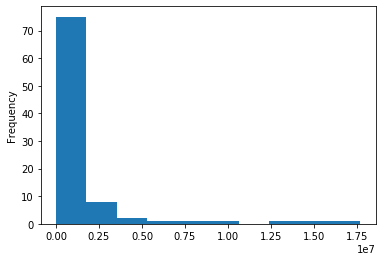

In [92]:
df_artists['followers'].plot(kind='hist');

First release distribution

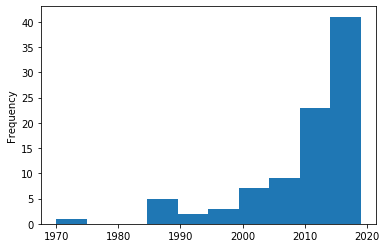

In [93]:
df_artists['first_release'].plot(kind='hist');

Genres distribution per day - not exclusive categories

In [94]:
# Day 1
df_artists.loc[df_artists['day'] == 1, [c for c in df_artists.columns if 'genre:' in c and 'related_' not in c]].mean()\
          .sort_values(ascending=False).head()

genre: argentine indie    0.15625
genre: edm                0.12500
genre: pop                0.12500
genre: trap espanol       0.09375
genre: latin rock         0.09375
dtype: float64

In [95]:
# Day 2
df_artists.loc[df_artists['day'] == 2, [c for c in df_artists.columns if 'genre:' in c and 'related_' not in c]].mean()\
          .sort_values(ascending=False).head()

genre: pop                0.258065
genre: argentine indie    0.225806
genre: latin rock         0.193548
genre: rock nacional      0.161290
genre: argentine rock     0.161290
dtype: float64

In [96]:
# Day 3
df_artists.loc[df_artists['day'] == 3, [c for c in df_artists.columns if 'genre:' in c and 'related_' not in c]].mean()\
          .sort_values(ascending=False).head()

genre: pop                0.178571
genre: electro house      0.142857
genre: argentine indie    0.142857
genre: cumbia pop         0.142857
genre: manso indie        0.107143
dtype: float64

---

## Artist Clustering

In [158]:
rel_genres_cols = [rel_genre for rel_genre in df_artists.columns if 'related_genre:' in rel_genre]
rel_artist_cols = [rel_artist for rel_artist in df_artists.columns if 'related_artist:' in rel_artist]
cluster_data = df_artists.drop(['artist_id', 'followers', 'popularity', 'albums',
                                'genres', 'related_artists', 'related_genres', 'day',
                                'first_release']+ rel_artist_cols, axis=1)

In [159]:
cluster_data.shape

(91, 705)

In [160]:
from sklearn.preprocessing import Normalizer
scaler = StandardScaler()
normalizer = Normalizer()

cluster_data_std = scaler.fit_transform(cluster_data)
cluster_data_l2 = normalizer.fit_transform(cluster_data)

In [161]:
dist =  1 - cosine_similarity(cluster_data_l2)

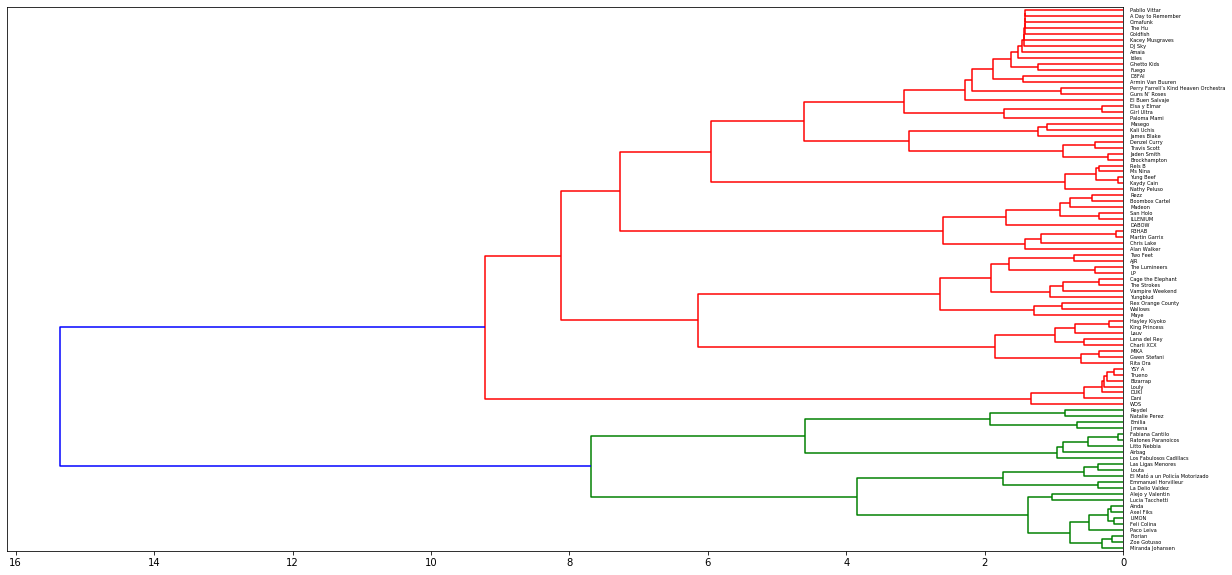

In [162]:
linkage_matrix = ward(dist)
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix, orientation = 'left', labels = df_artists.index)
plt.savefig('dendrogram.svg');

In [163]:
from sklearn.cluster import AgglomerativeClustering 

In [176]:
aggcluster = AgglomerativeClustering(n_clusters=15, linkage='average')
aggcluster.fit(cluster_data_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=15,
                        pooling_func='deprecated')

In [177]:
for i in range(aggcluster.n_clusters_):
    print('Cluster ', i)
    print(df_artists.index[aggcluster.labels_ == i])

Cluster  0
Index(['Travis Scott', 'Martin Garrix', 'Los Fabulosos Cadillacs',
       'Brockhampton', 'DUKI', 'Madeon', 'Rita Ora', 'King Princess', 'WOS',
       'Yungblud', 'Nathy Peluso', 'J mena', 'AJR', 'Louta', 'Two Feet',
       'Bizarrap', 'La Delio Valdez', 'Dani', 'Kaydy Cain', 'Boombox Cartel',
       'Cimafunk', 'Ms Nina', 'Feli Colina', 'Axel Fiks', 'Lucia Tacchetti',
       'DJ Sky', 'Alejo y Valentin', 'The Strokes', 'Gwen Stefani',
       'Armin Van Buuren', 'Ratones Paranoicos', 'ILLENIUM', 'Kacey Musgraves',
       'Litto Nebbia', 'Charli XCX', 'Jaden Smith', 'R3HAB', 'Hayley Kiyoko',
       'El Mató a un Policía Motorizado', 'Rels B', 'Emmanuel Horvilleur',
       'Kali Uchis', 'Paloma Mami', 'Fabiana Cantilo', 'Trueno', 'Amaia',
       'Wallows', 'Yung Beef', 'Zoe Gotusso', 'Girl Ultra',
       'Las Ligas Menores', 'Ainda', 'Ghetto Kids', 'D3FAI', 'Paco Leiva',
       'LIMON', 'Louly', 'Lana del Rey', 'Cage the Elephant', 'Alan Walker',
       'Rezz', 'Rex Orange Cou

## Viz

In [178]:
import plotly.graph_objects as go

In [179]:
from sklearn.manifold import TSNE

In [180]:
tsne = TSNE()
tsne_plot = tsne.fit_transform(cluster_data_l2)

In [200]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10, min_samples=3)
dbscan.fit(tsne_plot)

DBSCAN(algorithm='auto', eps=10, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [201]:
data = go.Scatter(x=tsne_plot[:,0], y=tsne_plot[:,1], 
                  mode='markers', 
                  marker=dict(color=dbscan.labels_),
                  hovertext=df_artists.index)
fig = go.Figure(data=data)
fig.show()